In [105]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

# 1. Business understanding



# 2. Data understanding


# 3. Data preparation


In [106]:
df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df['Gender'] = df['Gender'].replace({'Female': '0', 'Male': '1'})
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'no': '0', 'yes': '1'})
df['FAVC'] = df['FAVC'].replace({'no': '0', 'yes': '1'})
df['SMOKE'] = df['SMOKE'].replace({'no': '0', 'yes': '1'})
df['SCC'] = df['SCC'].replace({'no': '0', 'yes': '1'})
df['CALC'] = df['CALC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['MTRANS'] = df['MTRANS'].replace({'Walking': '0', 'Bike': '1', 'Motorbike': '2', 'Public_Transportation': '3', 'Automobile': '4'})
df['CAEC'] = df['CAEC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': '0', 'Normal_Weight': '1', 'Overweight_Level_I': '2', 'Overweight_Level_II': '3', 'Obesity_Type_I': '4', 'Obesity_Type_II': '5', 'Obesity_Type_III': '6'})

df['Gender'] = df['Gender'].astype(int)
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(int)
df['FAVC'] = df['FAVC'].astype(int)
df['SMOKE'] = df['SMOKE'].astype(int)
df['SCC'] = df['SCC'].astype(int)
df['CALC'] = df['CALC'].astype(int)
df['MTRANS'] = df['MTRANS'].astype(int)
df['CAEC'] = df['CAEC'].astype(int)
df['NObeyesdad'] = df['NObeyesdad'].astype(int)
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.125059,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.676969,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


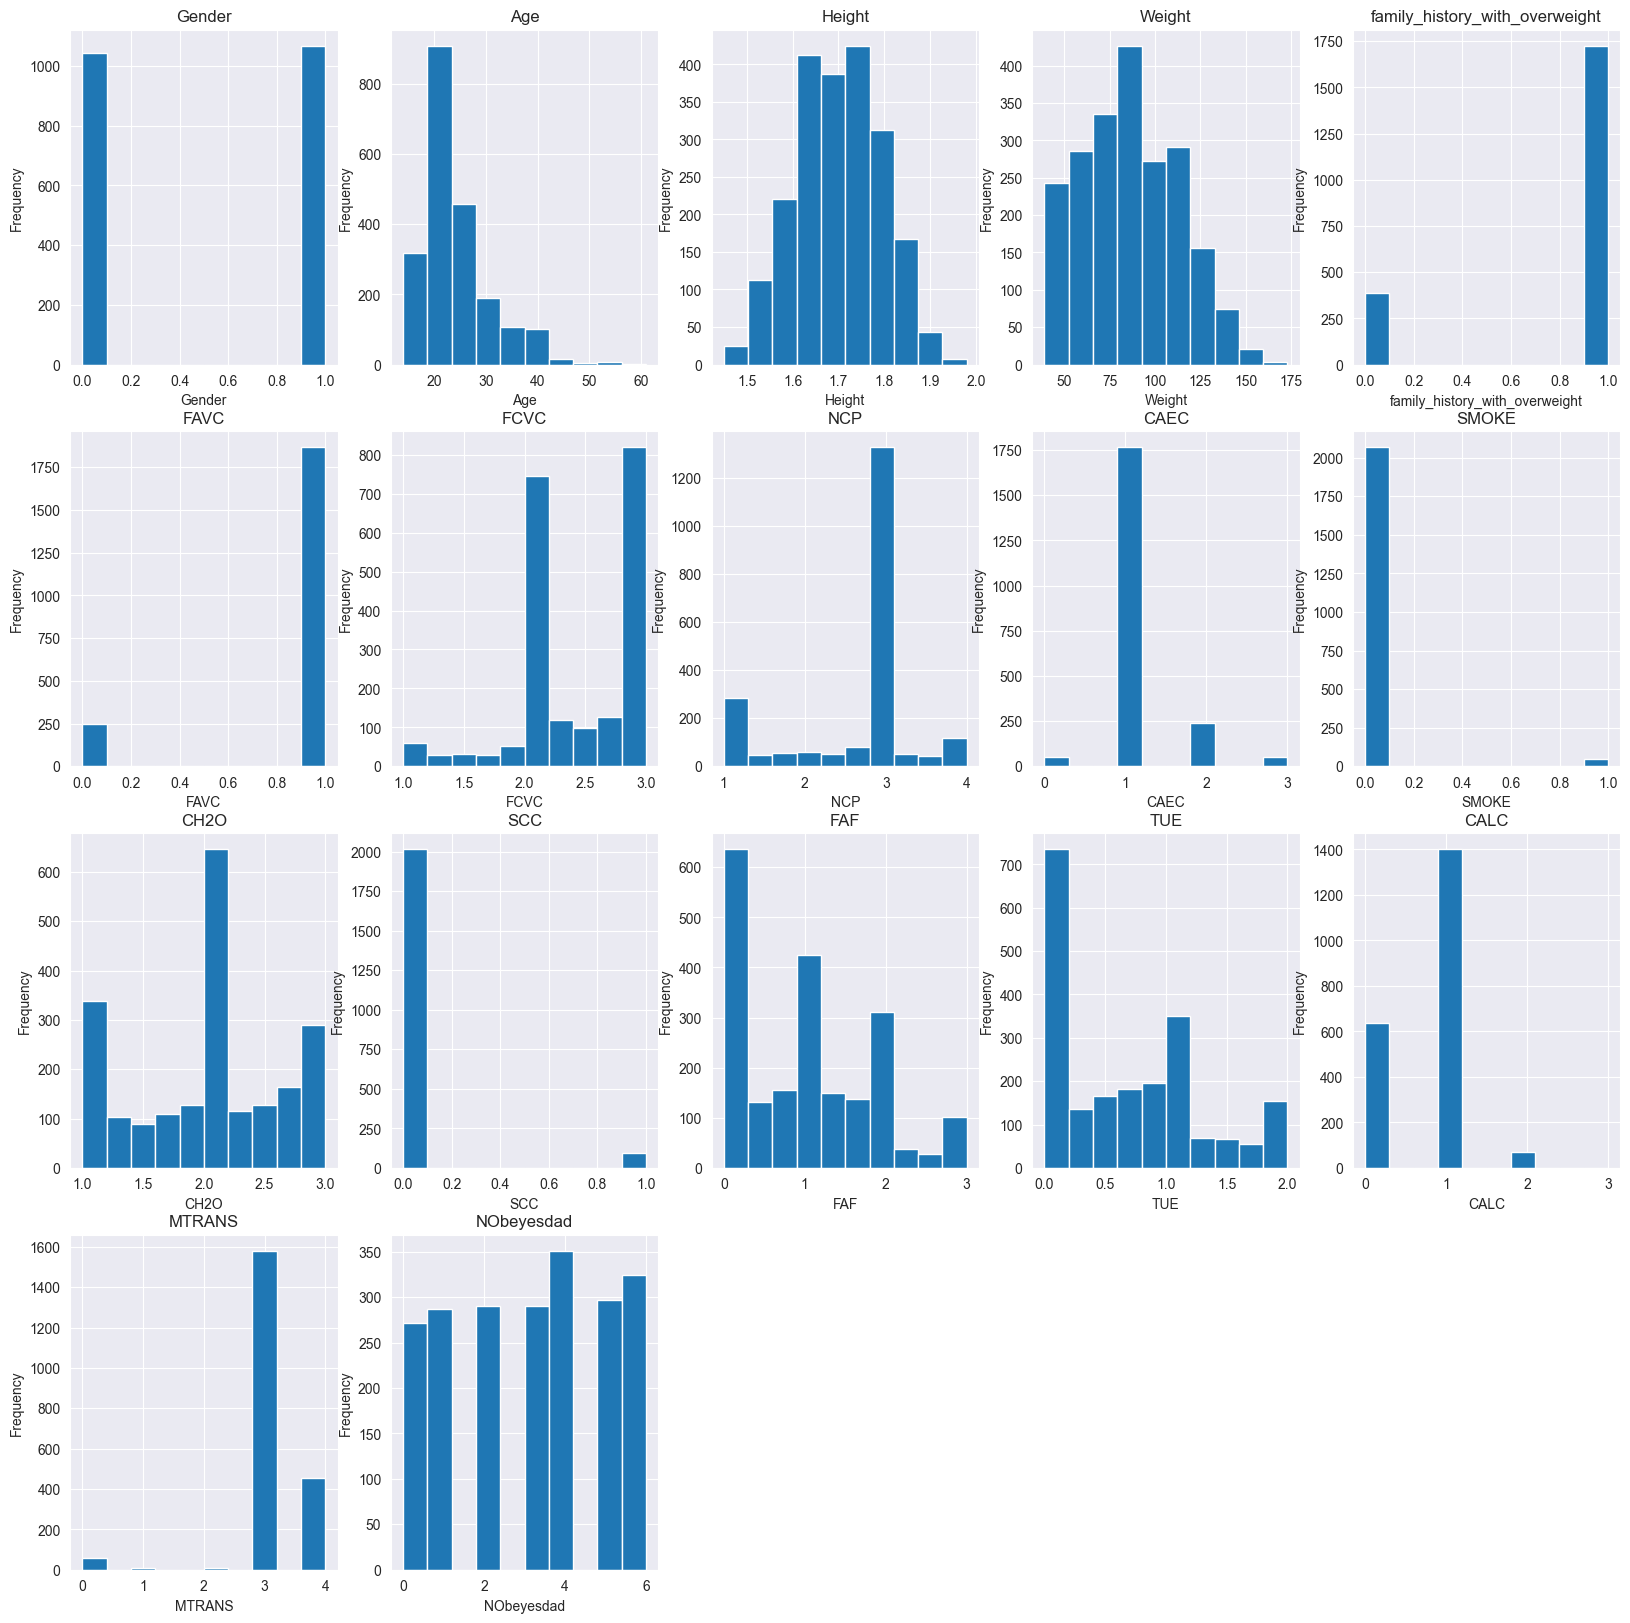

In [107]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
    plt.subplot(4, 5, i + 1)
    df[col].plot(kind='hist', title=col)
    plt.xlabel(col)

## 4. Modelling

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

df.drop('NObeyesdad', axis=1, inplace=True)

y = df['SMOKE']
X = df.drop('SMOKE', axis=1)
X = X.astype(float)

In [109]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
reg = LogisticRegression()
reg.fit(X, y)
y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=10)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

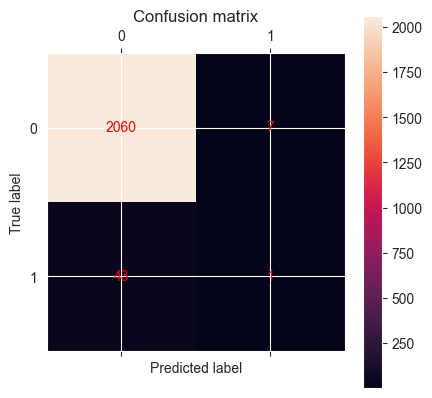

Accuracy: 0.98
Precision: 0.12
Recall: 0.02


In [110]:
# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Accuracy: %0.2f" % accuracy)
print("Precision: %0.2f" % precision)
print("Recall: %0.2f" % recall)